# Classifications for data science using Python
## Logistic regression, Decision tree, Random forest, and Artificial neural networks (MLP)
<P>Prepared by: Chukiat Worasucheep
<P>Date: July 2022

## Retrieve and prepare the data

In [1]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap

In [2]:
# Read the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [3]:
dataset.describe().applymap('{:.2f}'.format)

,User ID,Age,EstimatedSalary,Purchased
count,400.00,400.00,400.00,400.00
mean,15691539.76,37.66,69742.50,0.36
std,71658.32,10.48,34096.96,0.48
min,15566689.00,18.00,15000.00,0.00
25%,15626763.75,29.75,43000.00,0.00
50%,15694341.50,37.00,70000.00,0.00
75%,15750363.00,46.00,88000.00,1.00
max,15815236.00,60.00,150000.00,1.00


In [4]:
df = dataset.drop(['User ID'], axis=1)
df.head(18)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19.0,19000.0,0
1,Male,35.0,20000.0,0
2,Female,26.0,43000.0,0
3,Female,27.0,57000.0,0
4,Male,19.0,76000.0,0
5,Male,27.0,58000.0,0
6,Female,27.0,84000.0,0
7,Female,32.0,150000.0,1
8,Male,25.0,33000.0,0
9,Female,35.0,65000.0,0


In [5]:
# Encode data: transform each categorical variables into numerical (0, 1, 2, ...)

from sklearn.preprocessing import LabelEncoder

# Create instance of label encoder
le1 = LabelEncoder()

# Assign numerical values and replace in the same column
df['Gender'] = le1.fit_transform(df['Gender'])

# Do similarly for the label Purchased
le2 = LabelEncoder()
df['Purchased'] = le2.fit_transform(df['Purchased'])

df.head(15)

,Gender,Age,EstimatedSalary,Purchased
0,1,19.0,19000.0,0
1,1,35.0,20000.0,0
2,0,26.0,43000.0,0
3,0,27.0,57000.0,0
4,1,19.0,76000.0,0
5,1,27.0,58000.0,0
6,0,27.0,84000.0,0
7,0,32.0,150000.0,1
8,1,25.0,33000.0,0
9,0,35.0,65000.0,0


In [6]:
# Define features X and target variable y
#
X = df.iloc[:, 0:3].values
y = df.iloc[:, 3].values
X, y  # and see them

(array([[1.0e+00, 1.9e+01, 1.9e+04],
        [1.0e+00, 3.5e+01, 2.0e+04],
        [0.0e+00, 2.6e+01, 4.3e+04],
        ...,
        [0.0e+00, 5.0e+01, 2.0e+04],
        [1.0e+00, 3.6e+01, 3.3e+04],
        [0.0e+00, 4.9e+01, 3.6e+04]]),
 array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 1, 1, 1, 0, 

In [7]:
# Split the dataset into the Training set and Test set
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [8]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [9]:
y_train

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,

In [10]:
# Scale the features
#
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)   # .fit() and then .transform()
X_test  = sc.transform(X_test)

## Logistic regression

In [11]:
# Logistic regression
#
from sklearn.linear_model import LogisticRegression

# Create a decision tree classifier and train it with the training set
#
lr = LogisticRegression(random_state=101)
lr.fit(X_train, y_train)

LogisticRegression(random_state=101)

In [12]:
# Predict with the testing set and see the results
#
lr_pred = lr.predict(X_test)
lr_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [13]:
# Look at the actual y_test
#
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

## Decision Tree

In [14]:
# Decision Tree Classifier
#
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier and train it with the training set
#
dt = DecisionTreeClassifier(random_state=101)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=101)

In [15]:
# Predict with the testing set and see the results
#
dt_pred = dt.predict(X_test)
dt_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [16]:
# Look at the actual y_test
#
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [17]:
dt.feature_importances_

array([0.02368942, 0.52744149, 0.44886909])

In [18]:
import matplotlib.pyplot as plt

def show_feature_importances(algo_name, column_names, importances):
    sorted_indices = np.argsort(importances)[::-1] # Sort the feature importance in descending order

    plt.rcParams["figure.figsize"] = (8, 4)
    title = 'Feature Importances using ' + algo_name
    plt.title(title, fontsize=15)
    plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
    plt.xticks(range(X_train.shape[1]), column_names[sorted_indices], rotation=0)
    
    a = importances[sorted_indices]
    for index, data in enumerate(a):
        plt.text(x=index , y=data+.005 , s=f"{data:.3f}" , fontdict=dict(fontsize=12))
    
    plt.tight_layout()
    print(column_names, importances)
    plt.show()

['Gender' 'Age' 'EstimatedSalary' 'Purchased'] [0.02368942 0.52744149 0.44886909]


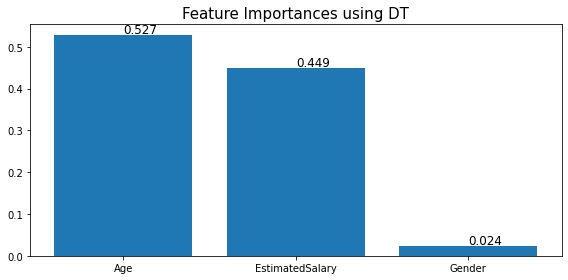

In [19]:
show_feature_importances('DT', df.columns.values, dt.feature_importances_)

## Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Create RF and train it with Training set
#
rf = RandomForestClassifier(random_state=101)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=101)

In [21]:
# Predict with the Test set and see the results
#
rf_pred = rf.predict(X_test)
rf_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [22]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

['Gender' 'Age' 'EstimatedSalary' 'Purchased'] [0.01112591 0.50792301 0.48095108]


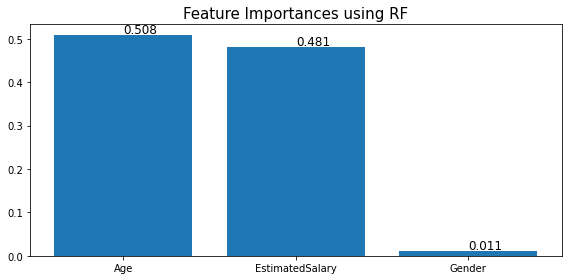

In [23]:
show_feature_importances('RF', df.columns.values, rf.feature_importances_)

## MLP Artificial Neural Network (ANN)

In [24]:
from sklearn.neural_network import MLPClassifier

# Create MLP and train it with Training set
#
nn = MLPClassifier(max_iter=1000, random_state=101)
nn.fit(X_train, y_train)

MLPClassifier(max_iter=1000, random_state=101)

In [25]:
# Predict with the Test set and see the results
#
nn_pred = nn.predict(X_test)
nn_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [26]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [27]:
# Unfortunetly, there is no easy way to show relative importances of features from MLPClassifier
#
#show_feature_importances('NN', df.columns.values, nn.feature_importances_)

## Performance of classification algorithms: accuracy, F1_score

In [28]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
# See performance metrices of logistic regression
#
lr_acc = accuracy_score(y_test, lr_pred)
print('Accuracy Score: ', lr_acc)

lr_rec = round(recall_score(y_test, lr_pred), 3)
print('Recall Score:   ', lr_rec)

lr_pre = round(precision_score(y_test, lr_pred), 3)
print('Precision Score:', lr_pre)

lr_f1 = round(f1_score(y_test, lr_pred), 3)
print('F1 score:       ', lr_f1)

Accuracy Score:  0.8625
Recall Score:    0.731
Precision Score: 0.826
F1 score:        0.776


In [30]:
# See the confusion matrix of logistic regression
#
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

[[50  4]
 [ 7 19]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        54
           1       0.83      0.73      0.78        26

    accuracy                           0.86        80
   macro avg       0.85      0.83      0.84        80
weighted avg       0.86      0.86      0.86        80



In [31]:
# See performance metrices of decision tree
#
dt_acc = accuracy_score(y_test, dt_pred)
print('Accuracy Score: ', dt_acc)

dt_rec = round(recall_score(y_test, dt_pred), 3)
print('Recall Score:   ', dt_rec)

dt_pre = round(precision_score(y_test, dt_pred), 3)
print('Precision Score:', dt_pre)

dt_f1 = round(f1_score(y_test, dt_pred), 3)
print('F1 score:       ', dt_f1)

Accuracy Score:  0.8875
Recall Score:    0.885
Precision Score: 0.793
F1 score:        0.836


In [32]:
# See the confusion matrix of decision tree
#
print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

[[48  6]
 [ 3 23]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        54
           1       0.79      0.88      0.84        26

    accuracy                           0.89        80
   macro avg       0.87      0.89      0.88        80
weighted avg       0.89      0.89      0.89        80



In [33]:
# See performance metrices of random forest
#
rf_acc = accuracy_score(y_test, rf_pred)
print('Accuracy Score: ', rf_acc)

rf_rec = round(recall_score(y_test, rf_pred), 3)
print('Recall Score:   ', rf_rec)

rf_pre = round(precision_score(y_test, rf_pred), 3)
print('Precision Score:', rf_pre)

rf_f1 = round(f1_score(y_test, rf_pred), 3)
print('F1 score:       ', rf_f1)

Accuracy Score:  0.9
Recall Score:    0.923
Precision Score: 0.8
F1 score:        0.857


In [34]:
# See the confusion matrix of random forest
#
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

[[48  6]
 [ 2 24]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.92        54
           1       0.80      0.92      0.86        26

    accuracy                           0.90        80
   macro avg       0.88      0.91      0.89        80
weighted avg       0.91      0.90      0.90        80



In [35]:
# See performance metrices MLP (artificial neural network)
#
nn_acc = accuracy_score(y_test, nn_pred)
print('Accuracy Score: ', nn_acc)

nn_rec = round(recall_score(y_test, nn_pred), 3)
print('Recall Score:   ', nn_rec)

nn_pre = round(precision_score(y_test, nn_pred), 3)
print('Precision Score:', nn_pre)

nn_f1 = round(f1_score(y_test, nn_pred), 3)
print('F1 score:       ', nn_f1)

Accuracy Score:  0.9125
Recall Score:    0.962
Precision Score: 0.806
F1 score:        0.877


In [36]:
# See the confusion matrix of nn (artificial neural network)
#
print(confusion_matrix(y_test, nn_pred))
print(classification_report(y_test, nn_pred))

cmat = confusion_matrix(y_test, nn_pred) # for further visualizaiton

[[48  6]
 [ 1 25]]
              precision    recall  f1-score   support

           0       0.98      0.89      0.93        54
           1       0.81      0.96      0.88        26

    accuracy                           0.91        80
   macro avg       0.89      0.93      0.90        80
weighted avg       0.92      0.91      0.91        80



### A probably nicer confusion matrix

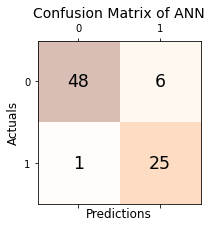

In [37]:
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cmat, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cmat.shape[0]):
    for j in range(cmat.shape[1]):
        ax.text(x=j, y=i,s=cmat[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix of ANN', fontsize=14)
plt.show()

## Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)
ROC curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.
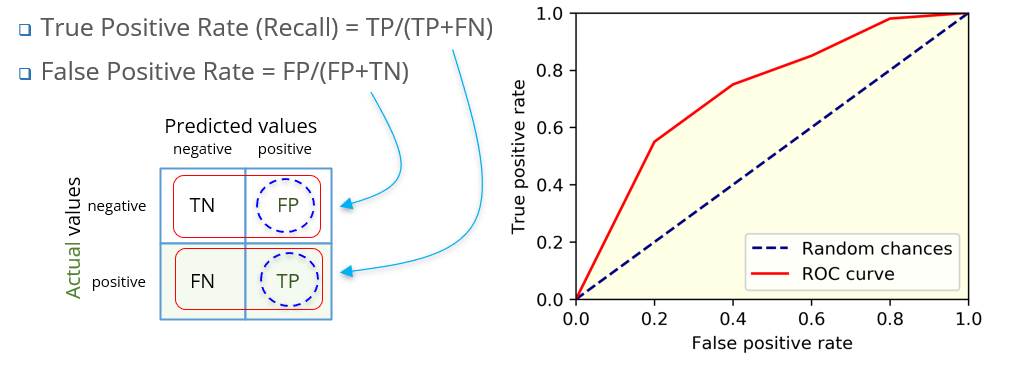

In [38]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities and keep for the positive outcomes only
lr_probs = lr.predict_proba(X_test)[:, 1]
dt_probs = dt.predict_proba(X_test)[:, 1]
rf_probs = rf.predict_proba(X_test)[:, 1]
nn_probs = nn.predict_proba(X_test)[:, 1]

# generate a no-skill prediction (majority class)
bl_probs = [0 for _ in range(len(X_test))]

print("Probability to be 'yes'")
print('LR: ', [round(x, 3) for x in lr_probs], '\n')
print('DT: ', [round(x, 3) for x in dt_probs], '\n')
print('RF: ', [round(x, 3) for x in rf_probs], '\n')
print('NN: ', [round(x, 3) for x in nn_probs], '\n')

Probability to be 'yes'
LR:  [0.101, 0.38, 0.744, 0.167, 0.161, 0.683, 0.054, 0.352, 0.07, 0.054, 0.674, 0.844, 0.447, 0.23, 0.33, 0.146, 0.605, 0.528, 0.352, 0.4, 0.683, 0.836, 0.433, 0.352, 0.409, 0.017, 0.022, 0.76, 0.458, 0.717, 0.169, 0.512, 0.051, 0.02, 0.806, 0.321, 0.926, 0.649, 0.381, 0.062, 0.09, 0.064, 0.283, 0.2, 0.904, 0.256, 0.167, 0.19, 0.744, 0.11, 0.237, 0.931, 0.032, 0.864, 0.81, 0.248, 0.962, 0.024, 0.058, 0.357, 0.433, 0.517, 0.046, 0.303, 0.175, 0.733, 0.404, 0.662, 0.226, 0.237, 0.143, 0.073, 0.427, 0.376, 0.181, 0.153, 0.084, 0.038, 0.321, 0.244] 

DT:  [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.5, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 

RF:  [0.0, 0.2

In [39]:
# calculate AUC scores
lr_auc = roc_auc_score(y_test, lr_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
nn_auc = roc_auc_score(y_test, nn_probs)
bl_auc = roc_auc_score(y_test, bl_probs)

# summarize AUC scores
print('AUC (area under ROC):')
print('Log. Regression: %.3f' % lr_auc)
print('Decision tree:   %.3f' % dt_auc)
print('Random foreset:  %.3f' % rf_auc)
print('Neural net:      %.3f' % nn_auc)
print('Baseline:        %.3f' % bl_auc)

AUC (area under ROC):
Log. Regression: 0.942
Decision tree:   0.886
Random foreset:  0.963
Neural net:      0.973
Baseline:        0.500


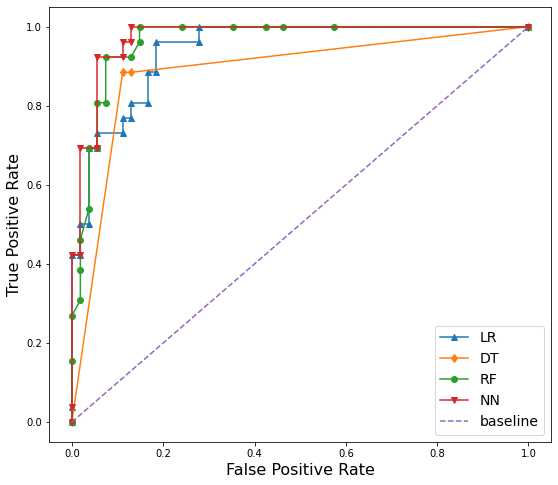

In [40]:
# calculate ROC curves to plt
bl_fpr, bl_tpr, _ = roc_curve(y_test, bl_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_probs)

# set figure size and axis labels
plt.rcParams["figure.figsize"] = (9, 8)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

# plot the ROC curve for the models
plt.plot(lr_fpr, lr_tpr, marker='^', label='LR')
plt.plot(dt_fpr, dt_tpr, marker='d', label='DT')
plt.plot(rf_fpr, rf_tpr, marker='o', label='RF')
plt.plot(nn_fpr, nn_tpr, marker='v', label='NN')
plt.plot(bl_fpr, bl_tpr, linestyle='--', label='baseline')

# show the legend and then show the plot
plt.legend(fontsize=14)
plt.show()

In [41]:
print('Accuracy Score:')
print('Log. regression:', lr_acc)
print('Decision Tree:  ', dt_acc)
print('Random Forest:  ', rf_acc)
print('Neural Net      ', nn_acc)

Accuracy Score:
Log. regression: 0.8625
Decision Tree:   0.8875
Random Forest:   0.9
Neural Net       0.9125


In [42]:
print('F1-Score:')
print('Log. regression:', lr_f1)
print('Decision Tree:  ', dt_f1)
print('Random Forest:  ', rf_f1)
print('Neural Net:     ', nn_f1)

F1-Score:
Log. regression: 0.776
Decision Tree:   0.836
Random Forest:   0.857
Neural Net:      0.877


## Summary
<code>
Accuracy Score:
Log. regression: 0.8625
Decision Tree: 0.8875
Random Forest: 0.9
Neural Net     0.9125

F1-Score:
Log. regression: 0.776
Decision Tree: 0.836
Random Forest: 0.857
Neural Net:    0.877

AUC (area under ROC):
Log. Regression: 0.942
Decision tree:  0.886
Random foreset: 0.963
Neural net:     0.973
Baseline:       0.500